#Replacing green screen with different kind of backgrounds

Major libraries used:
* OpenCV
* Matplotlib
* Numpy
* Imutils

At first, required the libraries were imported

In [133]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import imutils

Below, we have two functions: 
* Show Function:
This function is majorly used for displaying the image.
* Blur Function:
Here operation keeps the kernel above a pixel, adds all the 400 pixels below this kernel, takes the average, and replaces the central pixel with the new average value. This operation is continued for all the pixels in the image.

In [2]:
def show(title, img, color=True):
    plt.figure(figsize=(7,7))
    if color:
        plt.imshow(img[:,:,::-1]), plt.title(title, fontsize=(16))
        plt.show()
    else:
        plt.imshow(img, cmap='gray'), plt.title(title, fontsize=(16))
        plt.show()

In [91]:
def blurimg(img):
  kernel = np.ones((20,20),np.float32)/400
  dst = cv2.filter2D(img,-1,kernel)
  return dst

For the first image, we added a background to an object with green screen.
Steps involved were:
1. We collected the two images, one of an person with a green screen and another of the background.
2. After finding the range of the green background, we used this information for masking techniques, and removed the green background of the object.
3. Now, the background image was resized and bit-wise or operation was performed so that we can add the object with its background.
4. Both image and background were added to get the desired result

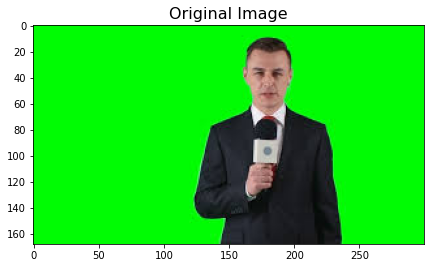

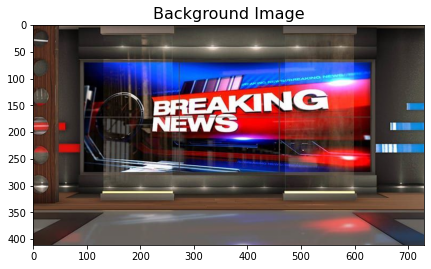

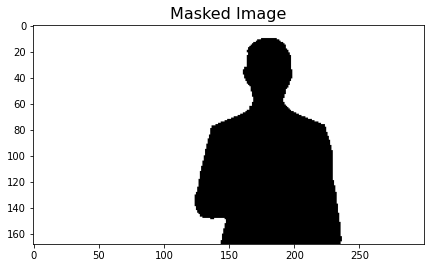

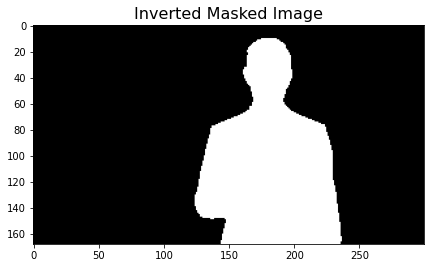

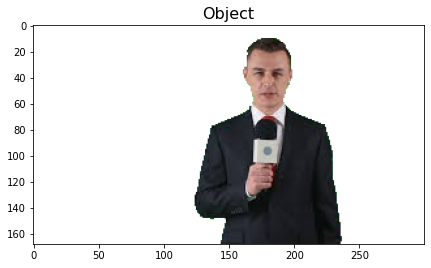

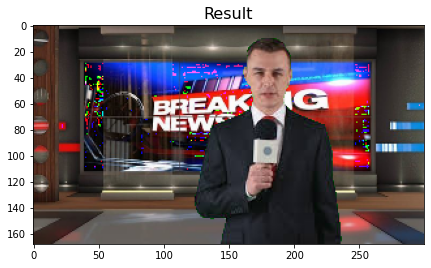

In [141]:
img = cv2.imread('green2.jpeg')
back=cv2.imread('reporter.jpg')
show('Original Image', img)
show('Background Image',back)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
mask=cv2.inRange(hsv,(45,100,100),(80,255,255))
mask_inv = cv2.bitwise_not(mask)
show('Masked Image', mask, False)
show('Inverted Masked Image', mask_inv, False)
res=255-cv2.cvtColor(mask_inv,cv2.COLOR_GRAY2BGR)
res = cv2.bitwise_and(img, img, mask=mask_inv)
black_pixels = np.where(
    (res[:, :, 0] == 0) & 
    (res[:, :, 1] == 0) & 
    (res[:, :, 2] == 0)
)
res[black_pixels] = [255, 255, 255]
show("Object",res)
(x,y,z) = res.shape 
back= cv2.resize(back,(y,x)) 
back= cv2.bitwise_or(back, back, mask = mask)
addedimage=res+back
show("Resultant Image",addedimage)


In our second image, we tried to invert the image of the object and then added the background.
Steps involved were:
1. We collected the two images, one of an person with a green screen and another of the background.
2. We used OpenCV library to invert the object.
3. After finding the range of the green background, we used this information for masking techniques, and removed the green background of the object.
4. Now, the background image was resized and bit-wise or operation was performed so that we can add the inverted object with its background.
5. Both  inverted image and background were added to get the desired result

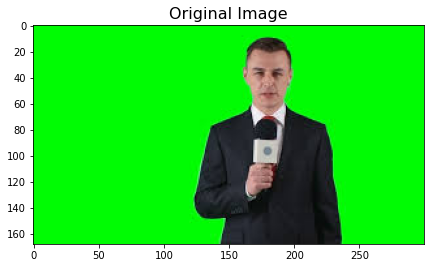

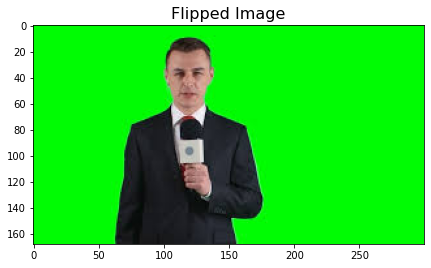

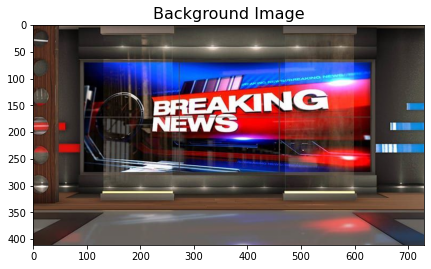

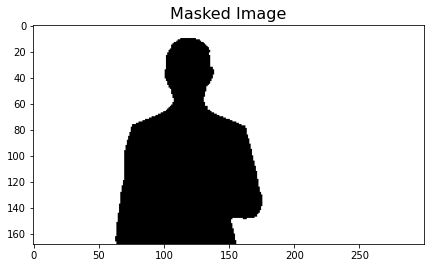

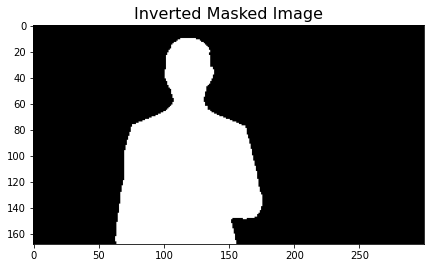

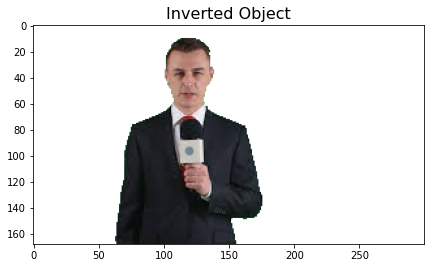

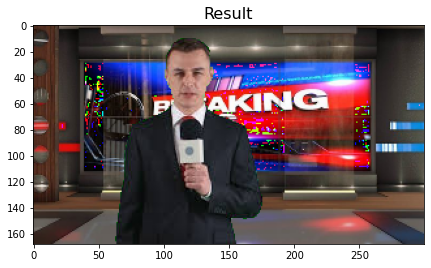

In [142]:
img = cv2.imread('green2.jpeg')
show('Original Image', img)
img=cv2.flip(img,1)
show('Flipped Image', img)
back=cv2.imread('reporter.jpg')
show('Background Image',back)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
mask=cv2.inRange(hsv,(45,100,100),(80,255,255))
mask_inv = cv2.bitwise_not(mask)
show('Masked Image', mask, False)
show('Inverted Masked Image', mask_inv, False)
res=255-cv2.cvtColor(mask_inv,cv2.COLOR_GRAY2BGR)
res = cv2.bitwise_and(img, img, mask=mask_inv)
black_pixels = np.where(
    (res[:, :, 0] == 0) & 
    (res[:, :, 1] == 0) & 
    (res[:, :, 2] == 0)
)
res[black_pixels] = [255, 255, 255]
show("Inverted Object",res)
(x,y,z) = res.shape 
back= cv2.resize(back,(y,x)) 
back= cv2.bitwise_or(back, back, mask = mask)
addedimage=res+back
show("Result",addedimage)


In our third image, we rotated the background through 45 degrees and then added the object.
Steps involved were:
1. We collected the two images, one of a cup with a green screen and another of background with some pattern.
2. We used imutils library to rotate the image.
3. After finding the range of the green background, we used this information for masking techniques, and removed the green background of the object.
4. Now, the background image was resized and bit-wise or operation was performed so that we can add the inverted object with its background.
5. Both object and rotated background were added to get the desired result


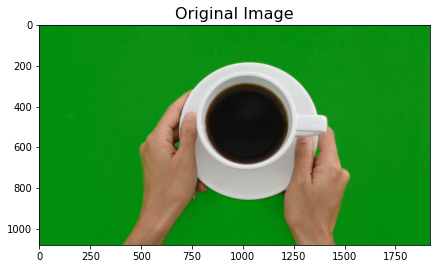

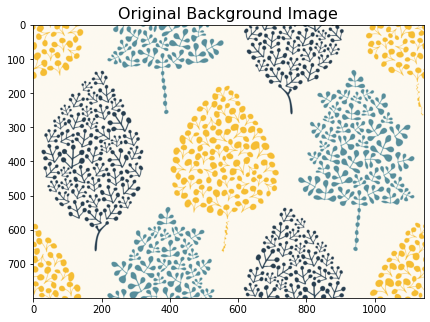

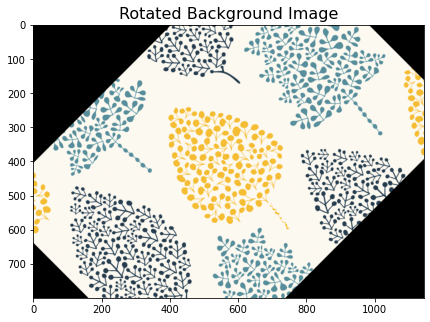

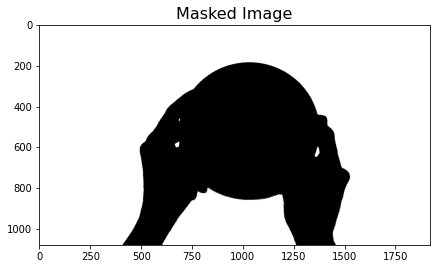

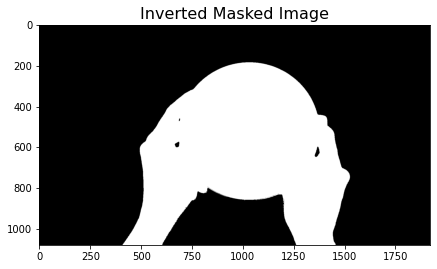

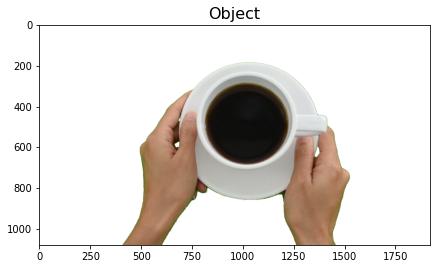

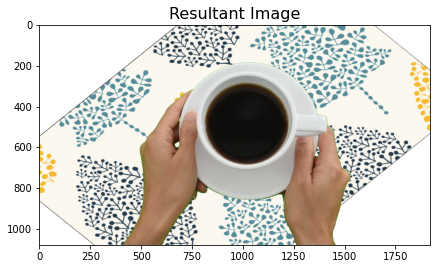

In [143]:
img = cv2.imread('cup.jpg')
show('Original Image', img)
back=cv2.imread('wallpaper.png')
show('Original Background Image', back)
back=imutils.rotate(back,45)
show('Rotated Background Image', back)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
mask=cv2.inRange(hsv,(45,100,100),(80,255,255))
mask_inv = cv2.bitwise_not(mask)
show('Masked Image', mask, False)
show('Inverted Masked Image', mask_inv, False)
res=255-cv2.cvtColor(mask_inv,cv2.COLOR_GRAY2BGR)
res = cv2.bitwise_and(img, img, mask=mask_inv)
black_pixels = np.where(
    (res[:, :, 0] == 0) & 
    (res[:, :, 1] == 0) & 
    (res[:, :, 2] == 0)
)
res[black_pixels] = [255, 255, 255]
show("Object",res)
(x,y,z) = res.shape 
back= cv2.resize(back,(y,x)) 
back= cv2.bitwise_or(back, back, mask = mask)
addedimage=res+back
show("Resultant Image",addedimage)


In our forth image, we blurred the background.
Steps involved were:
1. We collected the two images, one of a lady with green screen and another of the background.
2. We used the blurimg function (mentioned at the beginning) to blur the background image.
3. After finding the range of the green background, we used this information for masking techniques, and removed the green background of the object.
4. Now, the background image was resized and bit-wise or operation was performed so that we can add the inverted object with its background.
5. Both object and rotated background were added to get the desired result


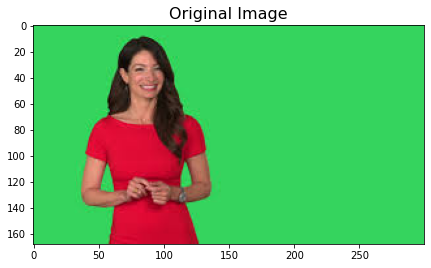

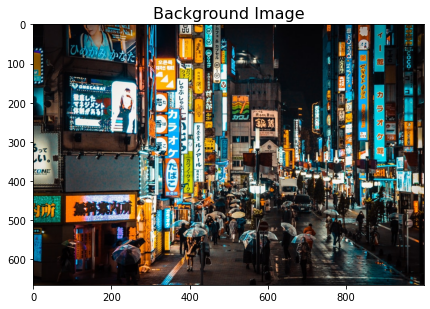

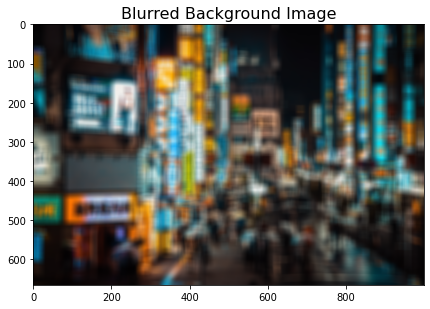

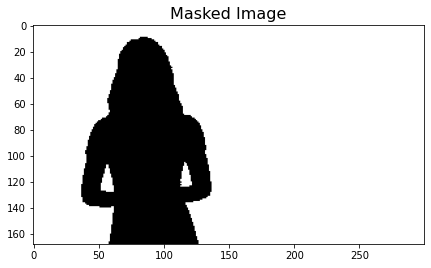

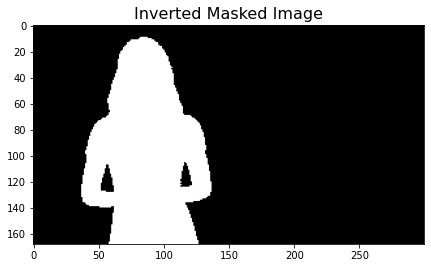

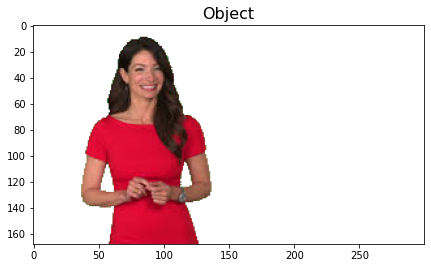

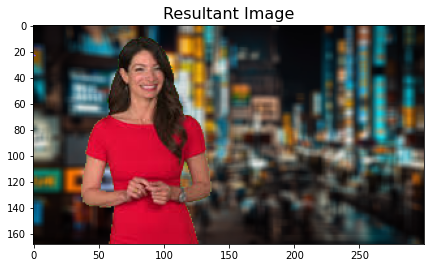

In [144]:
img = cv2.imread('green3.jpeg')
show('Original Image', img)
back=cv2.imread('city.jpeg')
show('Background Image', back)
back=blurimg(back)
show('Blurred Background Image', back)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
mask=cv2.inRange(hsv,(45,100,100),(80,255,255))
mask_inv = cv2.bitwise_not(mask)
show('Masked Image', mask, False)
show('Inverted Masked Image', mask_inv, False)
res=255-cv2.cvtColor(mask_inv,cv2.COLOR_GRAY2BGR)
res = cv2.bitwise_and(img, img, mask=mask_inv)
black_pixels = np.where(
    (res[:, :, 0] == 0) & 
    (res[:, :, 1] == 0) & 
    (res[:, :, 2] == 0)
)
res[black_pixels] = [255, 255, 255]
show("Object",res)
(x,y,z) = res.shape 
back= cv2.resize(back,(y,x)) 
back= cv2.bitwise_or(back, back, mask = mask)
addedimage=res+back
show("Resultant Image",addedimage)


In the last and final image, we made the background grayscale.
Steps involved were:
1. We collected the two images, one of a lady with green screen and another of the background.
2. After finding the range of the green background, we used this information for masking techniques, and removed the green background of the object.
3. Now, the background image was resized and bit-wise or operation was performed so that we can add the inverted object with its background.
4. Now, we converted the background to grayscale.
5. Both object and the grayscale background were added to get the desired result.


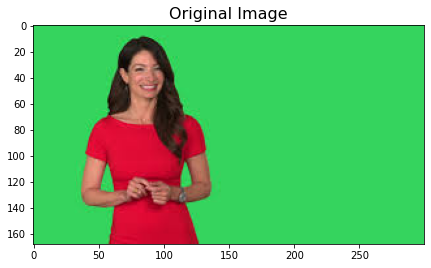

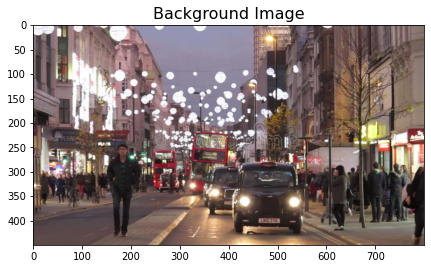

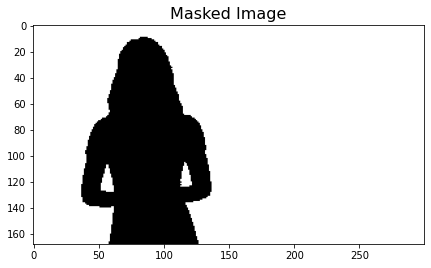

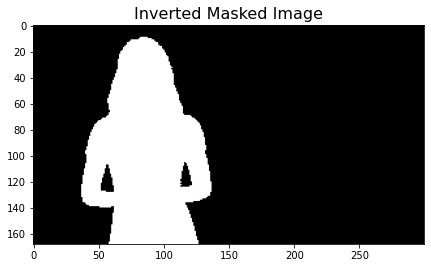

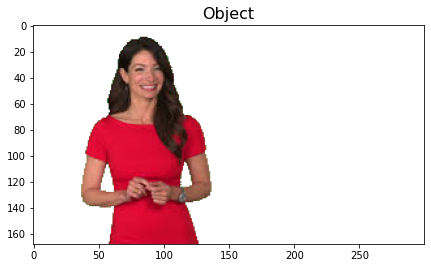

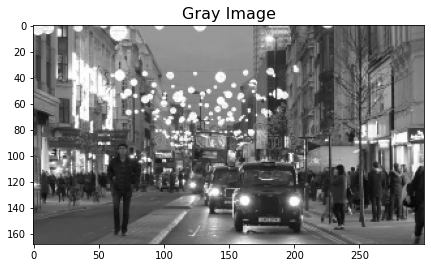

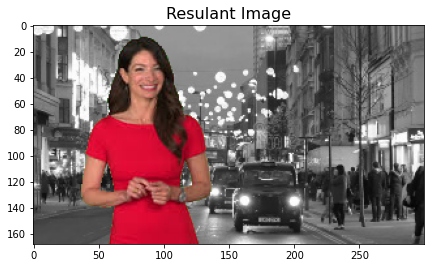

In [145]:
img = cv2.imread('green3.jpeg')
show('Original Image', img)
back=cv2.imread('busylondon.jpg')
show('Background Image', back)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
mask=cv2.inRange(hsv,(45,100,100),(80,255,255))
mask_inv = cv2.bitwise_not(mask)
show('Masked Image', mask, False)
show('Inverted Masked Image', mask_inv, False)
res=255-cv2.cvtColor(mask_inv,cv2.COLOR_GRAY2BGR)
res = cv2.bitwise_and(img, img, mask=mask_inv)
black_pixels = np.where(
    (res[:, :, 0] == 0) & 
    (res[:, :, 1] == 0) & 
    (res[:, :, 2] == 0)
)
res[black_pixels] = [255, 255, 255]
show("Object",res)
(x,y,z) = res.shape 
back= cv2.resize(back,(y,x)) 
gray_image = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)   
cv2.imwrite('gray.jpg', gray_image)
gray = cv2.imread('gray.jpg')
show("Gray Image",gray)
gray_portion = cv2.bitwise_or(gray, gray, mask = mask)
addedimage=res+gray_portion
show("Resulant Image",addedimage)
